## ECSE 415 - Intro to Computer Vision
### Assignment 1  
#### Saima Haneef - 260744058 

## 1. Denoising

In [87]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

#### 1.1 Filter the lighthouse image corrupted with Gaussian noise using a 5x5 Gaussian filter with variance of 2

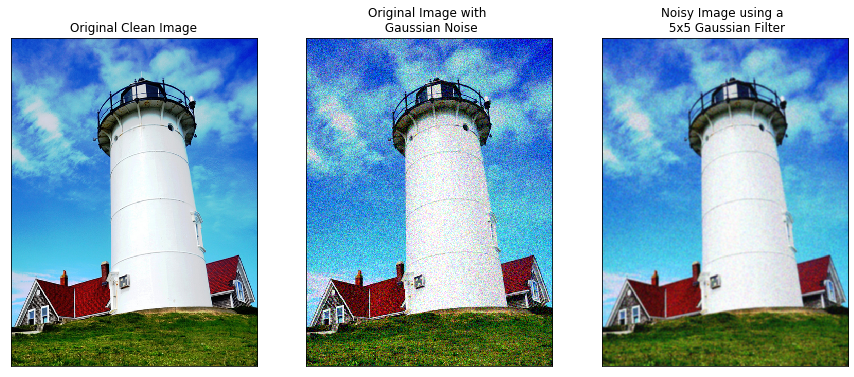

In [88]:
cleanimgpath = "./lighthouse.png"
cleanimg = cv2.imread(cleanimgpath)
imagepath = "./gaussian_lighthouse.png"
img = cv2.imread(imagepath)

# Use 5x5 gaussian filter with variance 2
gaussian = cv2.GaussianBlur(img, (5,5), math.sqrt(2))

# convert image from BGR to RGB
cleanimg = cv2.cvtColor(cleanimg, cv2.COLOR_BGR2RGB)
imgwithnoise = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gaussian = cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB)

# plot images
plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(cleanimg)
plt.title("Original Clean Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgwithnoise)
plt.title("Original Image with \n Gaussian Noise"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(gaussian)
plt.title("Noisy Image using a \n 5x5 Gaussian Filter"), plt.xticks([]), plt.yticks([])
plt.show()

#### 1.2 Filter the lighthouse image corrupted with Gaussian noise using a box filter of the same size

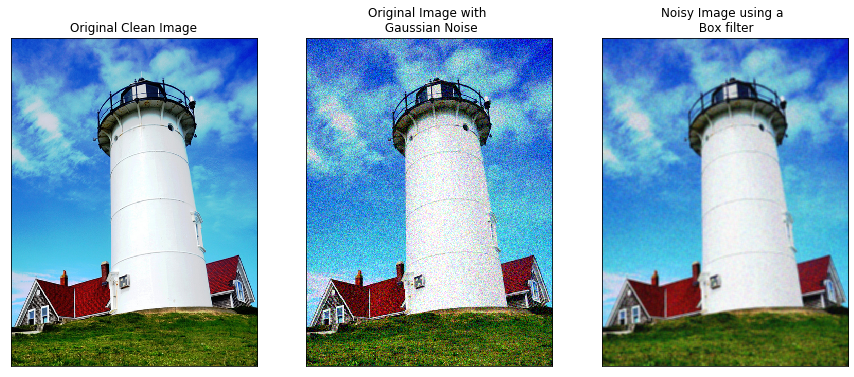

In [89]:
# box filter
kernel = np.ones((5,5), np.float32)/(5*5)

# image filtered using the box filter kernel
img2 = cv2.filter2D(img, -1, kernel)

# convert image from BGR to RGB
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# plot images
plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(cleanimg)
plt.title("Original Clean Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgwithnoise)
plt.title("Original Image with \n Gaussian Noise"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img2)
plt.title("Noisy Image using a \n Box filter"), plt.xticks([]), plt.yticks([])
plt.show()

#### 1.3 Compare the PSNR of both denoised images to the clean image and state which method gives the superior result

In [90]:
# PSNR of clean image and image with gaussian filter
psnr1 = cv2.PSNR(cleanimg, gaussian)
# PSNR of clean image and image with box filter
psnr2 = cv2.PSNR(cleanimg, img2)
print("PSNR of clean image and denoised image with gaussian filter is " + str(psnr1))
print("PSNR of clean image and denoised image with box filter is " + str(psnr2))

PSNR of clean image and denoised image with gaussian filter is 26.12002608453411
PSNR of clean image and denoised image with box filter is 24.888900237114374


> The method involving the usage of the 5x5 gaussian filter produces a superior result in comparison to the 5x5 box filter. This is because the PSNR of the gaussian filter with the clean image results in a higher PSNR than the PSNR of the box filter with the clean image (a higher peak signal to noise ratio).

#### 1.4 Filter the image corrupted by salt and pepper noise using the same Gaussian filter 

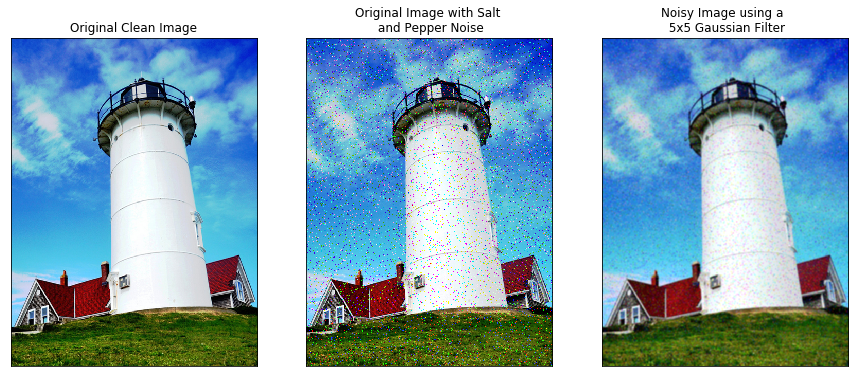

In [91]:
img3 = "./saltandpepper_lighthouse.png"
img3 = cv2.imread(img3)
gaussian2 = cv2.GaussianBlur(img3, (5,5), math.sqrt(2))

# convert image from BGR to RGB
imgwithnoise2 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
gaussian2 = cv2.cvtColor(gaussian2, cv2.COLOR_BGR2RGB)
 
# plot
plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(cleanimg)
plt.title("Original Clean Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgwithnoise2)
plt.title("Original Image with Salt \n and Pepper Noise"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(gaussian2)
plt.title("Noisy Image using a \n 5x5 Gaussian Filter"), plt.xticks([]), plt.yticks([])
plt.show()

#### 1.5 Filter the image corrupted by salt and pepper noise using a median filter of the same size

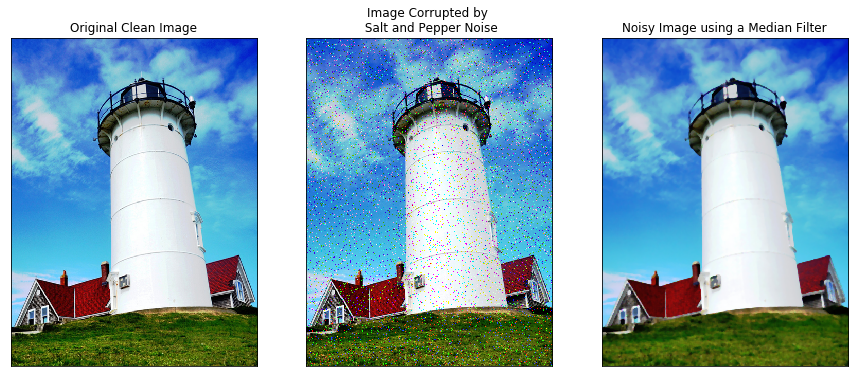

In [92]:
# filter image using 5x5 median filter
medianimg = cv2.medianBlur(img3, 5)

# convert image from BGR to RGB
medianimg = cv2.cvtColor(medianimg, cv2.COLOR_BGR2RGB)

# plot images
plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(cleanimg)
plt.title("Original Clean Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgwithnoise2)
plt.title("Image Corrupted by \n Salt and Pepper Noise"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(medianimg)
plt.title("Noisy Image using a Median Filter"), plt.xticks([]), plt.yticks([])
plt.show()

#### 1.6 Compare the PSNR of both of the denoised images to that of the clean image and state which method gives a better result

In [93]:
# PSNR of clean image and image with gaussian filter
psnr3 = cv2.PSNR(cleanimg, gaussian2)
# PSNR of clean image and image with median filter
psnr4 = cv2.PSNR(cleanimg, medianimg)
print("PSNR of clean image and denoised image with gaussian filter is " + str(psnr3))
print("PSNR of clean image and denoised image with median filter is " + str(psnr4))

PSNR of clean image and denoised image with gaussian filter is 25.268752608147924
PSNR of clean image and denoised image with median filter is 26.843612368248806


> The method involving the usage of the median filter gives a better result since it has a higher PSNR than that of the gaussian filter when compared to the clean image as shown above. A higher PSNR indicates better peak signal to noise ratio.

## 2. Sobel Edge Detector

#### 2.1 Apply a Sobel edge detector with the filter size of 3x3, 5x5 and 7x7 to the clean cameraman image. Threshold the filtered image using the following values of thresholds: 10% and 20% of the maximum pixel value in the filtered image

##### 2.1.1 Sobel edge detector with filter size of 3x3 with threshold of 10% and 20%

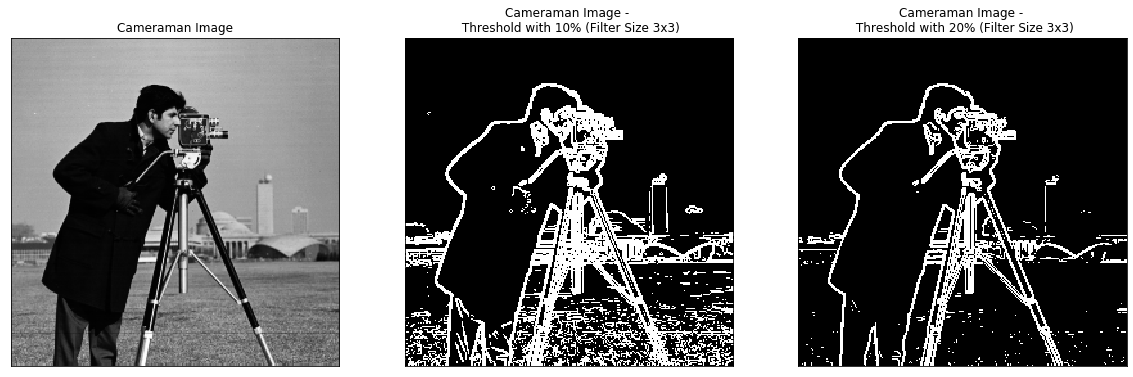

In [94]:
img_path = "./cameraman.png"

# read image as grayscale image
cameraman = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# apply 3x3 Sobel filters to the image
Ix1 = cv2.Sobel(cameraman, cv2.CV_64F, 1, 0, ksize=3)
Iy1 = cv2.Sobel(cameraman, cv2.CV_64F, 0, 1, ksize=3)
# calculate sobel Magnitude
Im1 = cv2.magnitude(Ix1, Iy1)
Ip1 = cv2.phase(Ix1, Iy1)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(cameraman, cmap="gray")
plt.title("Cameraman Image"), plt.xticks([]), plt.yticks([])

# Use the threshold function to obtain the two values of thresholds on the image
maxpixel = np.max(Im1)
ret1, Imthreshold10 = cv2.threshold(Im1, 0.1*maxpixel, 255, cv2.THRESH_BINARY)
ret2, Imthreshold20 = cv2.threshold(Im1, 0.2*maxpixel, 255, cv2.THRESH_BINARY)

# plot images
plt.subplot(132), plt.imshow(Imthreshold10, cmap="gray")
plt.title("Cameraman Image - \n Threshold with 10% (Filter Size 3x3)"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(Imthreshold20, cmap="gray")
plt.title("Cameraman Image - \n Threshold with 20% (Filter Size 3x3)"), plt.xticks([]), plt.yticks([])
plt.show()

##### 2.1.2 Sobel edge detector with filter size of 5x5 with threshold of 10% and 20%

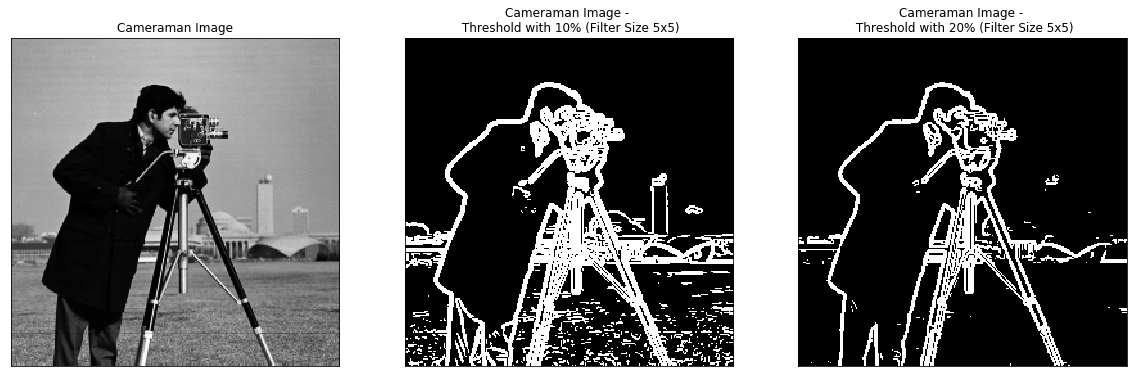

In [95]:
img_path = "./cameraman.png"

# read image as grayscale image
cameraman = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# apply 5x5 Sobel filters to the cameraman image
Ix2 = cv2.Sobel(cameraman, cv2.CV_64F, 1, 0, ksize=5)
Iy2 = cv2.Sobel(cameraman, cv2.CV_64F, 0, 1, ksize=5)
# calculate magnitude
Im2 = cv2.magnitude(Ix2, Iy2)
Ip2 = cv2.phase(Ix2, Iy2)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(cameraman, cmap="gray")
plt.title("Cameraman Image"), plt.xticks([]), plt.yticks([])

# Use the threshold function to obtain the two values of thresholds on the image
maxpixel2 = np.max(Im2)
ret3, Im2threshold10 = cv2.threshold(Im2, 0.1*maxpixel2, 255, cv2.THRESH_BINARY)
ret4, Im2threshold20 = cv2.threshold(Im2, 0.2*maxpixel2, 255, cv2.THRESH_BINARY)

# plot the images
plt.subplot(132), plt.imshow(Im2threshold10, cmap="gray")
plt.title("Cameraman Image - \n Threshold with 10% (Filter Size 5x5)"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(Im2threshold20, cmap="gray")
plt.title("Cameraman Image - \n Threshold with 20% (Filter Size 5x5)"), plt.xticks([]), plt.yticks([])
plt.show()

##### 2.1.3 Sobel edge detector with filter size of 7x7 with threshold of 10% and 20%

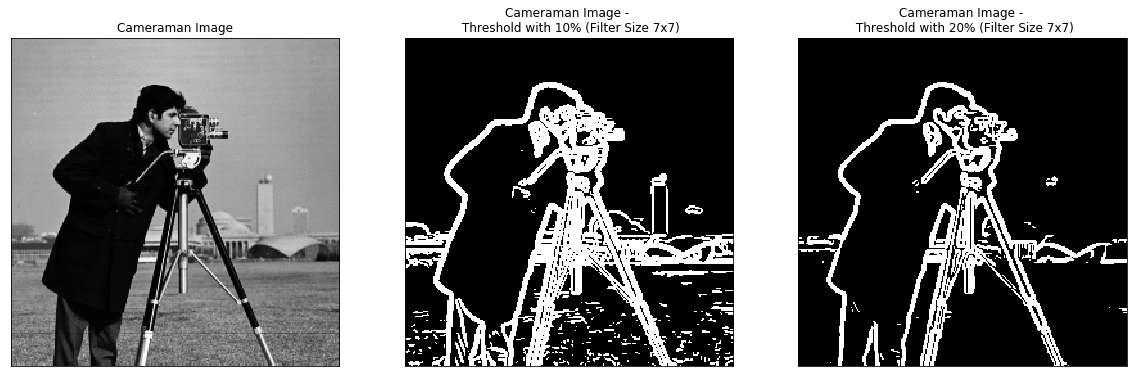

In [96]:
img_path = "./cameraman.png"
# read image as grayscale image
cameraman = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# apply 7x7 Sobel filters to the image
Ix3 = cv2.Sobel(cameraman, cv2.CV_64F, 1, 0, ksize=7)
Iy3 = cv2.Sobel(cameraman, cv2.CV_64F, 0, 1, ksize=7)
# calculate magnitude 
Im3 = cv2.magnitude(Ix3, Iy3)
Ip3 = cv2.phase(Ix3, Iy3)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(cameraman, cmap="gray")
plt.title("Cameraman Image"), plt.xticks([]), plt.yticks([])

# Use the threshold function to obtain the two values of thresholds on the image
maxpixel3 = np.max(Im3)
ret5, Im3threshold10 = cv2.threshold(Im3, 0.1*maxpixel3, 255, cv2.THRESH_BINARY)
ret6, Im3threshold20 = cv2.threshold(Im3, 0.2*maxpixel3, 255, cv2.THRESH_BINARY)

# plot the images
plt.subplot(132), plt.imshow(Im3threshold10, cmap="gray")
plt.title("Cameraman Image - \n Threshold with 10% (Filter Size 7x7)"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(Im3threshold20, cmap="gray")
plt.title("Cameraman Image - \n Threshold with 20% (Filter Size 7x7)"), plt.xticks([]), plt.yticks([])
plt.show()

#### 2.2 Comment on the effect of filter size on the output

> As the filter size increases, there are less white splotches on the grass area and the thickness of the detected edges increase as well. For example, in the images with a 3x3 filter, there are significantly more white splotches on the grass in the image while with a 7x7 filter, there are less. This is to be expected since a bigger filter size will detect significant edges. As the filter size increases, the images are less sensitive to smaller edge changes in pixels. Consequently, the images pick up bigger changes such as more obvious edges. 

#### 2.3 Apply a Sobel edge detector with a filter size of 3x3 using the cameraman image corrupted with Gaussian noise. Use two values of thresholds: 10% and 20% of the maximum pixel value in the filtered image

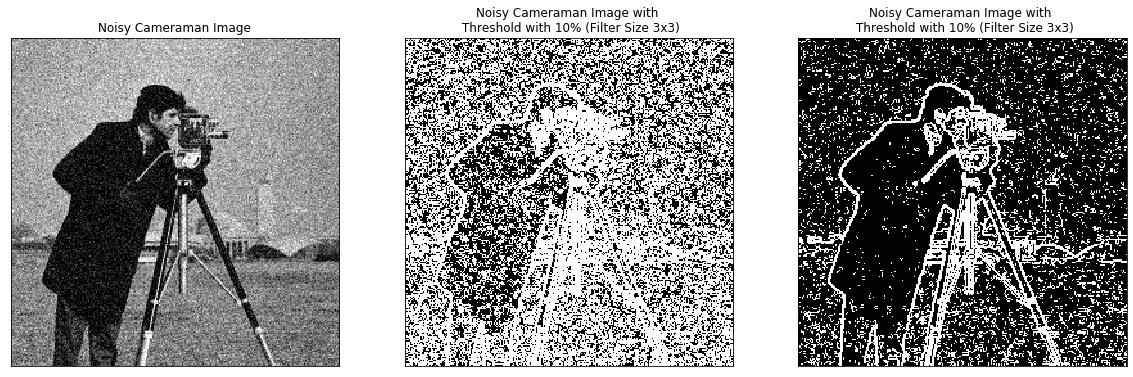

In [97]:
img_path = "./gaussian_cameraman.png"

# read image as grayscale image
cameraman = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# apply 3x3 Sobel filters to the noisy cameraman image
Ix4 = cv2.Sobel(cameraman, cv2.CV_64F, 1, 0, ksize=3)
Iy4 = cv2.Sobel(cameraman, cv2.CV_64F, 0, 1, ksize=3)
# calculate sobel Magnitude
Im4 = cv2.magnitude(Ix4, Iy4)
Ip4 = cv2.phase(Ix4, Iy4)

# display original image
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(cameraman, cmap="gray")
plt.title("Noisy Cameraman Image"), plt.xticks([]), plt.yticks([])

# Use the threshold function to obtain the two values of thresholds on the image
maxpixel4 = np.max(Im4)
res7, Im4threshold10 = cv2.threshold(Im4, 0.1*maxpixel, 255, cv2.THRESH_BINARY)
res8, Im4threshold20 = cv2.threshold(Im4, 0.2*maxpixel, 255, cv2.THRESH_BINARY)

# plot the images
plt.subplot(132), plt.imshow(Im4threshold10, cmap="gray")
plt.title("Noisy Cameraman Image with \n Threshold with 10% (Filter Size 3x3)"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(Im4threshold20, cmap="gray")
plt.title("Noisy Cameraman Image with \n Threshold with 10% (Filter Size 3x3)"), plt.xticks([]), plt.yticks([])
plt.show()

#### 2.4 Denoise the image with a 3x3 box filter and apply a Sobel edge detector. Use the same values of the thresholds from the previous question.

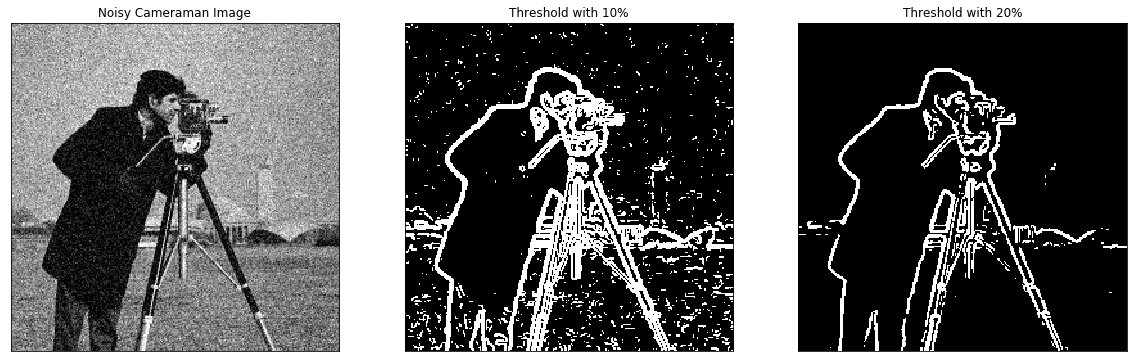

In [98]:
# create a box filter
kernel = np.ones((3,3), np.float32)/(3*3)

# filter the image using the box filter
res1 = cv2.filter2D(cameraman, -1, kernel)

# # apply 3x3 Sobel filter to the denoised image
Ix5 = cv2.Sobel(res1, cv2.CV_64F, 1, 0, ksize=3)
Iy5 = cv2.Sobel(res1, cv2.CV_64F, 0, 1, ksize=3)
# # compute sobel Magnitude/Phase
Im5 = cv2.magnitude(Ix5, Iy5)
# Ip5 = cv2.phase(Ix5, Iy5)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(cameraman, cmap="gray")
plt.title("Noisy Cameraman Image"), plt.xticks([]), plt.yticks([])

# # Use the threshold function to obtain the two values of thresholds on the image
maxpixel5 = np.max(Im5)

# use the values of threshold from previous example
# I interpreted this to mean that we are supposed to use the exact same threshold values 
# from the previous example (maxpixel4 from the previous question rather than maxpixel5)
ret9, Im5threshold10 = cv2.threshold(Im5, 0.1*maxpixel4, 255, cv2.THRESH_BINARY)
ret10, Im5threshold20 = cv2.threshold(Im5, 0.2*maxpixel4, 255, cv2.THRESH_BINARY)

# plot the images
plt.subplot(132), plt.imshow(Im5threshold10, cmap="gray")
plt.title("Threshold with 10%"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(Im5threshold20, cmap="gray")
plt.title("Threshold with 20%"), plt.xticks([]), plt.yticks([])
plt.show()

#### 2.5 Comment on the effectiveness of using denoising prior to edge detection.

> Very clearly, using denoising prior to edge detection results in an image with less noise around the image since the image is being smoothed before the Sobel edge detector is being used. This reduces the amount of noise overall (significantly less white patches around the image). The edges also appear thicker than that with no denoising before edge detection.

## 3. Laplacian of Gaussian

#### 3.1 Filter the cameraman image using a 5x5 Laplacian of Gaussian kernel

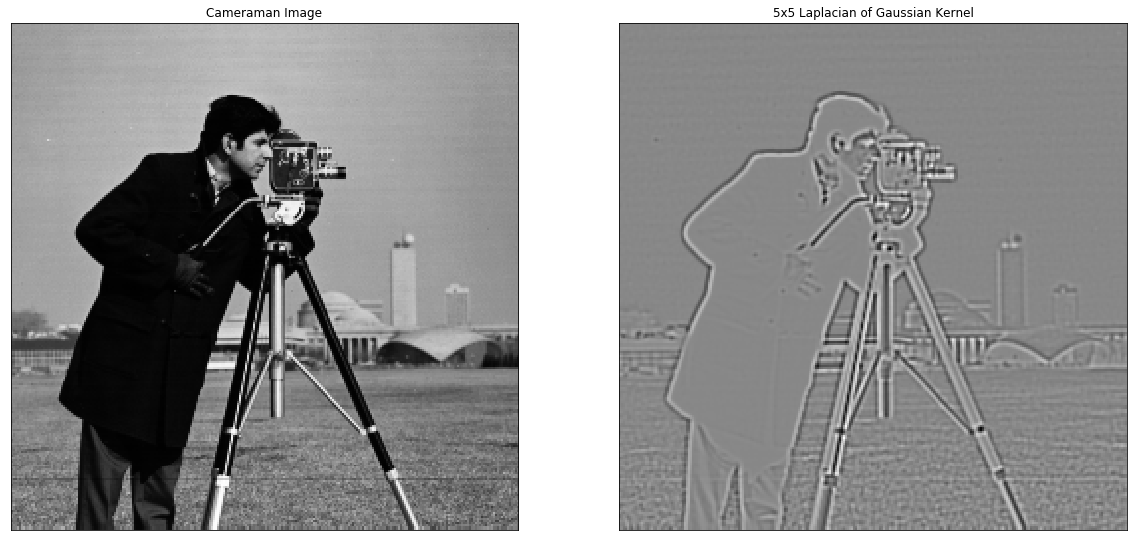

In [99]:
img_path = "./cameraman.png"

# read image as grayscale image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# use a 5x5 laplacian of gaussian kernel
I_lap = cv2.Laplacian(img, cv2.CV_32F, ksize=5)

# plot images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img, cmap="gray")
plt.title("Cameraman Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(I_lap, cmap="gray")
plt.title("5x5 Laplacian of Gaussian Kernel"), plt.xticks([]), plt.yticks([])
plt.show()

#### 3.2 Write your own code to detect edges in the above result. Zero-crossings in the filtered image indicate edges.

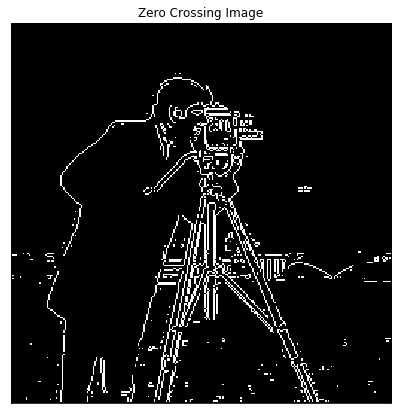

In [100]:
img_path = "./cameraman.png"
# read image as a grayscale image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Find 5x5 Laplacian of Gaussian kernel
lap = cv2.Laplacian(img, cv2.CV_32F, ksize=5)
# create new image of same size full of zeros (all black)
newimg = np.zeros(lap.shape)
# find appropriate threshold
thresh = 0.39*(np.max(lap))
zerocrossing=False

# iterate through the pixels through the laplacian
for x in range(1,lap.shape[0]-1):
    for y in range(1, lap.shape[1]-1):
        # create a 3x3 patch
        patch = [lap[x-1,y-1], lap[x, y-1], lap[x+1,y-1], lap[x-1,y], lap[x+1,y], lap[x-1,y+1], lap[x,y+1], lap[x+1,y+1], lap[x,y]]
        # find the max and min values in a patch
        maxval = np.max(patch)
        minval = np.min(patch)
        # check the signs of the pixel values between the each pixel being iterated through in the for loop
        # set zerocrossing to true if the signs are different in either the x or y direction, signifying a 
        # zero crossing
        if (lap[x-1,y]>0 and lap[x+1,y]<0) or (lap[x,y-1]>0 and lap[x,y+1]<0) or (lap[x-1,y]<0 and lap[x+1,y]>0) or (lap[x,y-1]<0 and lap[x,y+1]>0) :
            zerocrossing=True
        # if there is a change of sign in between a zero or positive pixel value and a zero crossing is detected
        # then set the pixel value to 255 (color white)
        if (lap[x,y]==0 and zerocrossing==True and ((maxval-minval)>thresh)) or (lap[x,y]>0 and zerocrossing==True and ((maxval-minval)>thresh)):
            newimg[x,y]=255
        zerocrossing=False

# display images
plt.figure(figsize=(15, 15))
plt.subplot(121), plt.imshow(newimg, cmap="gray")
plt.title("Zero Crossing Image"), plt.xticks([]), plt.yticks([])
plt.show()

## 4. Derivative of Gaussian

#### 4.1 Create a derivative of Gaussian kernel as follows. First create a gaussian kernel of size 7x7 using the given code. Then apply a 3x3 Sobel kernel in x an y direction separately to the Gaussian kernel. The resultant kernels are Derivative of Gaussian kernels. Apply a Derivative of Gaussian kernel created above to the cameraman image corrupted with Gaussian noise. Threshold the resultant image with two thresholds: 10% and 20% of the maximum pixel value in the filtered image.

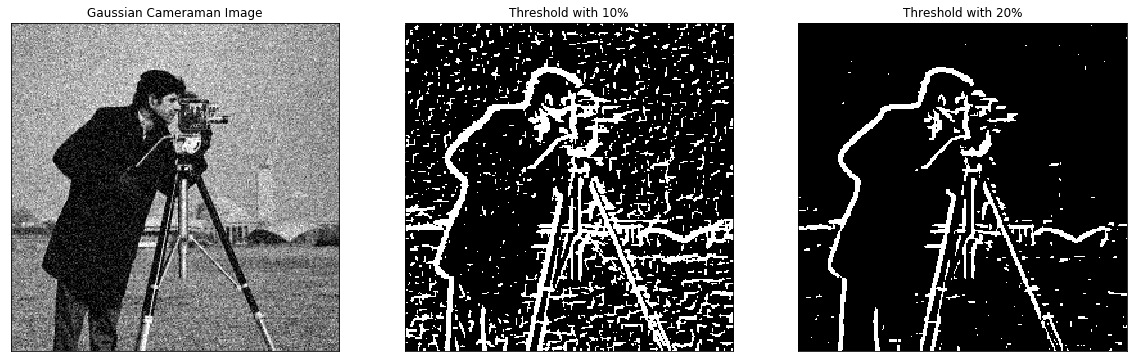

In [101]:
# Create Gaussian Kernel
temp = cv2.getGaussianKernel(7,-1)
Gauss = np.outer(temp, temp.transpose())

img_path = "./gaussian_cameraman.png"

# read image as a grayscale image
cameraman = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# apply 3x3 Sobel filters in x and y direction 
Ix8 = cv2.Sobel(Gauss, cv2.CV_64F, 1, 0, ksize=3)
Iy8 = cv2.Sobel(Gauss, cv2.CV_64F, 0, 1, ksize=3)
# filter image separately
Ix8 = cv2.filter2D(cameraman,-1,Ix8)
Iy8 = cv2.filter2D(cameraman,-1,Iy8)
# type conversion necessary or else an error is outputted
Ix8 = Ix8.astype('float32')
Iy8 = Iy8.astype('float32')
Im8 = cv2.magnitude(Ix8, Iy8)

# demonstrate images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(cameraman, cmap="gray")
plt.title("Gaussian Cameraman Image"), plt.xticks([]), plt.yticks([])

# Use the threshold function to obtain the two values of thresholds on the image
maxpixel = np.max(Im8)
ret11, Imthreshold10 = cv2.threshold(Im8, 0.1*maxpixel, 255, cv2.THRESH_BINARY)
ret12, Imthreshold20 = cv2.threshold(Im8, 0.2*maxpixel, 255, cv2.THRESH_BINARY)

# plot images
plt.subplot(132), plt.imshow(Imthreshold10, cmap="gray")
plt.title("Threshold with 10%"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(Imthreshold20, cmap="gray")
plt.title("Threshold with 20%"), plt.xticks([]), plt.yticks([])
plt.show()

#### 4.2 Denoise the same image with 5x5 Gaussian kernel. Apply a 3x3 Sobel edge detector on the denoised image. Use the same values of threshold before: 10% and 20% of the maximum pixel values in the filtered image.

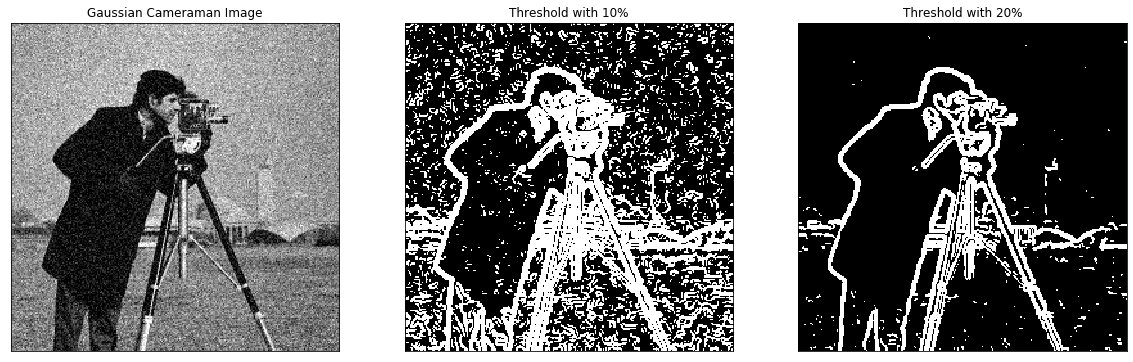

In [102]:
# Denoise Gaussian cameraman image with 5x5 gaussian kernel
gaussian = cv2.GaussianBlur(cameraman, (5,5), 0)

# apply 3x3 Sobel filters 
Ix6 = cv2.Sobel(gaussian, cv2.CV_64F, 1, 0, ksize=3)
Iy6 = cv2.Sobel(gaussian, cv2.CV_64F, 0, 1, ksize=3)
# Sobel magnitude
Im6 = cv2.magnitude(Ix6, Iy6)
Ip6 = cv2.phase(Ix6, Iy6)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(cameraman, cmap="gray")
plt.title("Gaussian Cameraman Image"), plt.xticks([]), plt.yticks([])

# Use the threshold function to obtain the two values of thresholds on the image
maxpixel6 = np.max(Im6)
ret13, Im6threshold10 = cv2.threshold(Im6, 0.1*maxpixel6, 255, cv2.THRESH_BINARY)
ret14, Im6threshold20 = cv2.threshold(Im6, 0.2*maxpixel6, 255, cv2.THRESH_BINARY)

# plot images
plt.subplot(132), plt.imshow(Im6threshold10, cmap="gray")
plt.title("Threshold with 10%"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(Im6threshold20, cmap="gray")
plt.title("Threshold with 20%"), plt.xticks([]), plt.yticks([])
plt.show()

#### 4.3 Apply 3x3 Sobel edge detector on the original noisy image. Use the same values of thresholds as before: 10% and 20% of the maximum pixel values in the filtered image.

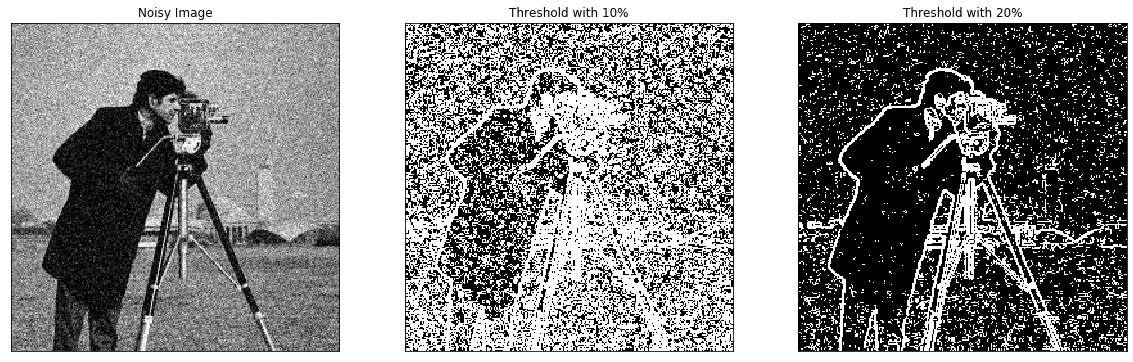

In [103]:
img_path = "./gaussian_cameraman.png"

# cameraman image read as a grayscale image
cameraman = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# apply 3x3 Sobel filters
Ix7 = cv2.Sobel(cameraman, cv2.CV_64F, 1, 0, ksize=3)
Iy7 = cv2.Sobel(cameraman, cv2.CV_64F, 0, 1, ksize=3)
# sobel magnitude
Im7 = cv2.magnitude(Ix7, Iy7)
Ip7 = cv2.phase(Ix7, Iy7)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(cameraman, cmap="gray")
plt.title("Noisy Image"), plt.xticks([]), plt.yticks([])

# Use the threshold function to obtain the two values of thresholds on the image
maxpixel7 = np.max(Im7)
ret15, Im7threshold10 = cv2.threshold(Im7, 0.1*maxpixel7, 255, cv2.THRESH_BINARY)
ret16, Im7threshold20 = cv2.threshold(Im7, 0.2*maxpixel7, 255, cv2.THRESH_BINARY)

# plot images
plt.subplot(132), plt.imshow(Im7threshold10, cmap="gray")
plt.title("Threshold with 10%"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(Im7threshold20, cmap="gray")
plt.title("Threshold with 20%"), plt.xticks([]), plt.yticks([])
plt.show()

#### 4.4 State your observations about the differences/similarities in the above three results

>Of all three images, the third result (only with a sobel filter) consists of the most noise all around the image (more white patches). This is because no denoising is done beforehand (denoising smooths the image and results in less noise afterwards as shown in the second image above) or no filtering is done before using the sobel filter. The second result (with the denoising) in comparison to the first image, seems to detect more edges as well. The thickness of the first two results is fairly similar and much thicker than that of the third result. For all three results, the thresholds with 10% contains more noise and white splotches than their respective images with a higher threshold of 20%. 

## 5. Canny Edge Detection

#### 5.1 Use canny edge detector to detect edges in the "yellow lily" image. Tune kernel size, lower and upper thresholds such that the final output is similar to the one shown as the expected output.

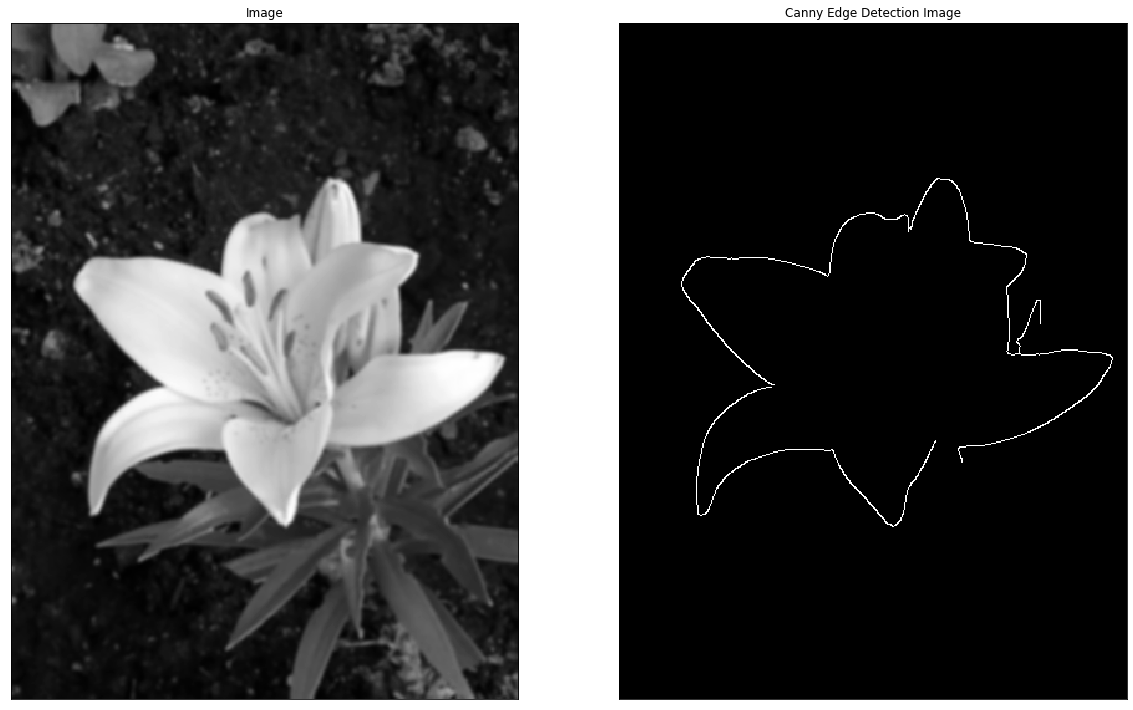

In [104]:
img_path = "./yellowlily.png"

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# gaussian filter used to denoise the yellow lily image
img = cv2.GaussianBlur(img, (7, 7), 0)

# Canny edge detector
I_edge = cv2.Canny(img, 110, 405, apertureSize=3)

# Plot images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img, cmap="gray")
plt.title("Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(I_edge, cmap="gray")
plt.title("Canny Edge Detection Image"), plt.xticks([]), plt.yticks([])
plt.show()

#### 5.2 Comment on how changing values of kernel size, lower and upper thresholds affect the overall edge detection

>Increasing the aperture size results in more outlines appearing in the image and more edges to be detected (not just the main object, more outlines in the surrounding image). Decreasing the Gaussian filter size (if gaussian blur is used to smooth the image beforehand which  I chose to do), results in more edges and outlines being detected (more outlines in the background and main parts of the image). Increasing the lower thresholds while maintaining the upper threshold results in gaps in the edges being detected (parts of the image edges disappear). Increasing the upper thresholds while maintaining the lower thresholds also results in gaps in the edges being detected (outlined aspects of the image start to disappear).